In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
df = pd.read_csv('energy.csv')
df = df[['year','country','energy_per_capita']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               17432 non-null  int64  
 1   country            17432 non-null  object 
 2   energy_per_capita  9035 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 408.7+ KB


In [69]:
df = pd.read_csv('energy.csv')
df = df[['year','country','energy_per_capita']]
print(df.info())
df = df.set_index([df['year'],df['country']])
df = df[['energy_per_capita']]
print(df.columns)
df_unstacked = df.unstack(level=1).droplevel(0, axis=1) 
print(df_unstacked.shape)
y = df_unstacked.fillna(0).values
df_unstacked.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               17432 non-null  int64  
 1   country            17432 non-null  object 
 2   energy_per_capita  9035 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 408.7+ KB
None
Index(['energy_per_capita'], dtype='object')
(121, 242)


country,Afghanistan,Africa,Albania,Algeria,American Samoa,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Vanuatu,Venezuela,Vietnam,Western Africa,Western Sahara,World,Yemen,Yugoslavia,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.head()

,,energy_per_capita
year,country,
1900,Afghanistan,NaN
1901,Afghanistan,NaN
1902,Afghanistan,NaN
1903,Afghanistan,NaN
1904,Afghanistan,NaN


In [70]:
y.min(axis=1).shape

(121,)

In [74]:
np.subtract(y,y.min(axis=1),dim=1)

TypeError: subtract() got an unexpected keyword argument 'axis'

In [76]:
y_n = (y.T-y.min(axis=1))/(y.max(axis=1)-y.min(axis=1))

/var/folders/sp/mlrrd77d24gb2cktbf3r6tpc0000gn/T/ipykernel_77386/2977831797.py:1: RuntimeWarning: invalid value encountered in divide
  y_n = (y.T-y.min(axis=1))/(y.max(axis=1)-y.min(axis=1))


In [78]:
y_n.shape

(242, 121)

In [79]:
y_n

array([[       nan,        nan,        nan, ..., 0.        , 0.        ,
               nan],
       [       nan,        nan,        nan, ..., 0.02123774, 0.0212669 ,
               nan],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
               nan],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
               nan],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
               nan]])

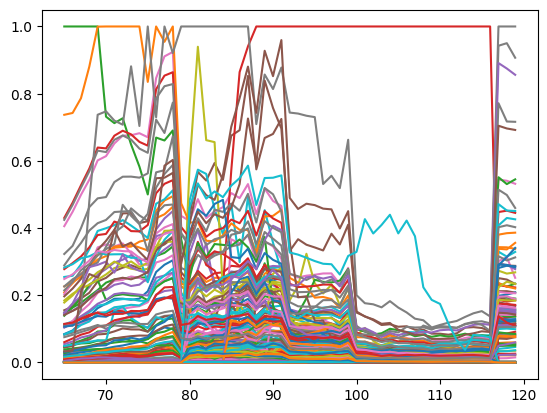

In [81]:
plt.plot(y_n.T);